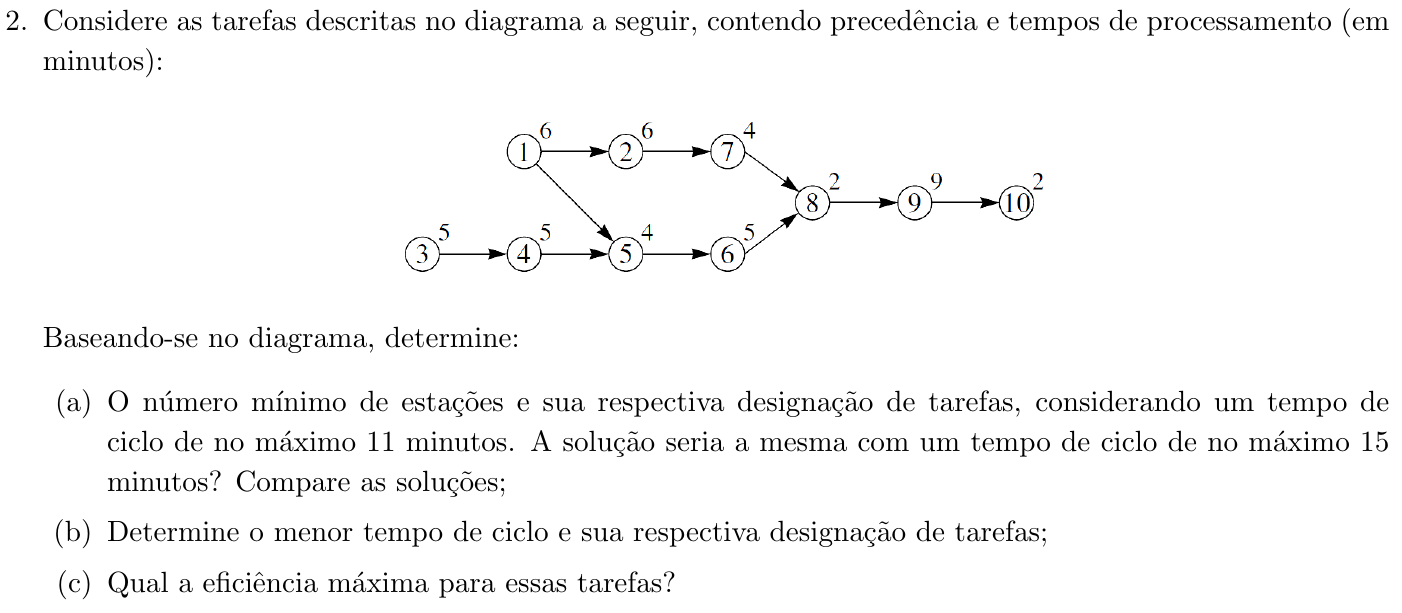

In [3]:
from IPython.display import Image 
Image(filename='images/2.png')

In [4]:
# Módulos
from pyomo.environ import *
from pyomo.opt import SolverFactory

In [5]:
# Dados
Tarefa = [n for n in range(1,11)]
Estacao = [m for m in range(1,11)]
tempos = {1: 6, 2: 6, 3: 5, 4: 5, 5: 4, 6: 5, 7: 4, 8: 2, 9: 9, 10: 2}
ciclo = 9
precedencia = [(1,2), (1,5), (2,7), (3,4), (4,5), (5,6), (6,8), (7,8), (8,9), (9,10)]

In [6]:
# Modelo
model = ConcreteModel()

# Conjuntos
model.T = Set(initialize=Tarefa)
model.E = Set(initialize=Estacao)
T,E = model.T, model.E

# Parâmetros
model.t = Param(T, initialize=tempos, within=NonNegativeReals)
model.c = Param(initialize=ciclo)
t, c = model.t, model.c

# Variáveis de decisão
model.x = Var(T * E, within=Binary)
x = model.x

# Função objetivo
model.obj = Objective(sense=minimize,
                      expr = sum(j * x[T.at(-1), j] for j in E))

# Restrições
# Indivisibilidade 
model.r_indiv = ConstraintList()
for i in T:
    model.r_indiv.add(expr = sum(x[i, j] for j in E) == 1)
# Carga respeita ciclo
model.r_ciclo = ConstraintList()
for j in E:
    model.r_ciclo.add(expr = sum(t[i]*x[i,j] for i in T) <= c)
# Precedencia
model.r_preced = ConstraintList()
for par in precedencia:
    i = par[0]
    k = par[1]
    model.r_preced.add(expr = sum(j*x[i,j] for j in E) - sum(j*x[k,j] for j in E) <= 0)

# model.pprint()

In [7]:
# Resolução
solver = SolverFactory('glpk')
resultado = solver.solve(model, tee = False)

In [8]:
# Apresentação de resultados
if (resultado.solver.status == SolverStatus.ok) and (resultado.solver.termination_condition != TerminationCondition.infeasible):
    for j in E:
        for i in T:
            if value(x[i,j]) == 1:
                print('Tarefa {} vai na máquina {}\n'.format(i,j))
else:
    print(resultado.solver.termination_condition)

Tarefa 1 vai na máquina 1

Tarefa 2 vai na máquina 2

Tarefa 3 vai na máquina 3

Tarefa 7 vai na máquina 3

Tarefa 4 vai na máquina 4

Tarefa 5 vai na máquina 4

Tarefa 6 vai na máquina 5

Tarefa 8 vai na máquina 5

Tarefa 9 vai na máquina 6

Tarefa 10 vai na máquina 7

